# Logistic Regression Forest Fires

Lizbeth Peralta Malváez, Omar López Rincón

Universidad de las Américas Puebla

La regresión logística permite clasificar más que inferir o predecir. Se utiliza la función sigmoidea y por eso el nombre de logística.

Un método utilizado para la regresión logística es el de máximo de verosimilitud, el cual completa el valor de una variable cuando no la conoce. Se puede utilizar para multiclase y para clasificación binaria.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [2]:
data = pd.read_csv('C:/Users/Liz/Downloads/forestfires.csv')
data.head()
# se agrega una columna de avance, 1 el avance de parkinson es 
#alto y 0 no es grave 
data['lluvia'] = (data.rain > 0).astype(int)

%matplotlib inline

In [3]:
data.groupby('lluvia').mean()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
lluvia,,,,,,,,,,,,
0,4.638507,4.288802,7.479371,90.595678,110.094695,547.41002,8.96778,18.881336,43.819253,3.989587,0.0,13.023694
1,6.625000,5.000000,7.250000,93.762500,160.350000,581.66250,12.45000,19.387500,74.125000,5.800000,1.4,1.623750


In [4]:
data.groupby('temp').mean()

,X,Y,month,FFMC,DMC,DC,ISI,RH,wind,rain,area,lluvia
temp,,,,,,,,,,,,
2.2,4.000000,6.000000,12.000000,84.700000,26.700000,352.600000,4.100000,59.000000,4.900000,0.0,9.270000,0.0
4.2,6.000000,3.000000,2.000000,84.900000,27.500000,353.500000,3.400000,51.000000,4.000000,0.0,0.000000,0.0
4.6,3.833333,3.833333,8.666667,82.700000,18.266667,238.383333,2.350000,37.500000,6.866667,0.0,12.101667,0.0
4.8,4.000000,6.000000,12.000000,84.400000,27.200000,353.500000,6.800000,57.000000,8.500000,0.0,8.980000,0.0
5.1,6.200000,5.000000,9.200000,84.520000,44.680000,333.340000,6.420000,63.800000,6.520000,0.0,13.896000,0.0
5.2,4.000000,5.000000,1.000000,18.700000,1.100000,171.400000,0.000000,100.000000,0.900000,0.0,0.000000,0.0
5.3,4.666667,4.666667,2.000000,83.700000,8.833333,37.000000,2.700000,72.000000,3.133333,0.0,0.713333,0.0
5.5,2.000000,2.000000,3.000000,89.300000,51.300000,102.200000,9.600000,59.000000,6.300000,0.0,0.000000,0.0
5.8,6.000000,5.000000,4.000000,81.500000,9.100000,55.200000,2.700000,54.000000,5.800000,0.0,7.770000,0.0


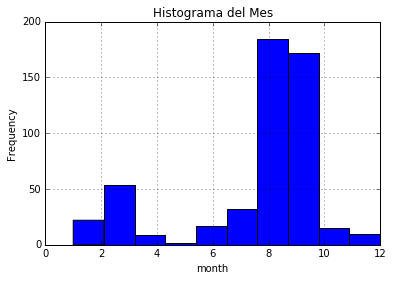

In [5]:
# histograma de mes
data.month.hist()
plt.title('Histograma del Mes')
plt.xlabel('month')
plt.ylabel('Frequency')

In [6]:
y, X = dmatrices('lluvia ~ month + temp + RH',
                  data, return_type="dataframe")
print (X.columns)

Index(['Intercept', 'month', 'temp', 'RH'], dtype='object')


In [7]:
# Regresion logistica
model = LogisticRegression()
model = model.fit(X, y)

# Certezas
model.score(X, y)

C:\Users\Liz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.98452611218568664

In [8]:
# Para evaluar, se utiliza el 30% de la base de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\Liz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# predicción de clases
predicted = model2.predict(X_test)
print (predicted)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [10]:
# probabilidaddes
#si la segunda columnda es mayor a 0.5, si llovió
probs = model2.predict_proba(X_test)
print (probs)

[[ 0.95321316  0.04678684]
 [ 0.97996137  0.02003863]
 [ 0.98802115  0.01197885]
 [ 0.99570645  0.00429355]
 [ 0.98501247  0.01498753]
 [ 0.9905678   0.0094322 ]
 [ 0.97155813  0.02844187]
 [ 0.98035813  0.01964187]
 [ 0.9767458   0.0232542 ]
 [ 0.93606608  0.06393392]
 [ 0.98933529  0.01066471]
 [ 0.99803361  0.00196639]
 [ 0.98492122  0.01507878]
 [ 0.97248416  0.02751584]
 [ 0.9701851   0.0298149 ]
 [ 0.9742774   0.0257226 ]
 [ 0.98969051  0.01030949]
 [ 0.99267642  0.00732358]
 [ 0.95815802  0.04184198]
 [ 0.98364325  0.01635675]
 [ 0.98743243  0.01256757]
 [ 0.99472515  0.00527485]
 [ 0.9249312   0.0750688 ]
 [ 0.9908796   0.0091204 ]
 [ 0.99088338  0.00911662]
 [ 0.99620262  0.00379738]
 [ 0.99524127  0.00475873]
 [ 0.97514005  0.02485995]
 [ 0.9947255   0.0052745 ]
 [ 0.99231233  0.00768767]
 [ 0.97720786  0.02279214]
 [ 0.9877827   0.0122173 ]
 [ 0.98627667  0.01372333]
 [ 0.99242385  0.00757615]
 [ 0.99267683  0.00732317]
 [ 0.98896395  0.01103605]
 [ 0.96408418  0.03591582]
 

In [11]:
# evaluación
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.987179487179
0.75974025974


Con el modelo propuesto, tomando la base de datos de los incendios. Podríamos intentar predecir si habrá o no lluvia tomando en consideración los datos de la fecha, la temperatura y la humedad.